### Imports

In [1]:
import os
import numpy as np
import pandas as pd

# plotting modules
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt

### Load Data

In [10]:
df_raw = pd.read_excel('dataset/all_phase_data.xlsx')
df_clean = pd.read_csv('dataset/clean_sample_data.csv', index_col=0)

### Preview data and shape

In [11]:
# Preview of raw data
df_raw.head(5)

,SL,Bar code Id,Age,Gender,Company Name,1. What is your occupation?,2. What education did you complete?,3. Can you read Bangla?,4. What is your marital status?,5. What is your monthly family expenditure?,...,5-38. PHC system is workable to prevent NCD diseases..2,5-39. Using PHC system is a good idea..2,5-40. I feel good to receive PHC service..2,5-41. I intend to use PHC system in the future..2,"5-42. If PHC system is available, I will always use it..2",5-43. It is worth to receive PHC service..2,5-44. PHC system is a pleasant experience..2,5-45. I spend time to know about PHC system..2,5-46. Using PHC system causes many advantages..2,5-47. I like to use PHC system..2
0,215,1000236740,56,Female,Grameen Bank,Autonomous,7. Higher (Master or Doctor) completed,3. Yes,2. Current married or living together,"5. Taka 50,001 or more",...,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0
1,116,1001011776,51,Female,Grameen Bank,Autonomous,4. High school completed,3. Yes,2. Current married or living together,"5. Taka 50,001 or more",...,5.0,5.0,5.0,5.0,4.0,4.0,3.0,1.0,4.0,5.0
2,39,1001014480,60,Male,Grameen Bank,Autonomous,7. Higher (Master or Doctor) completed,3. Yes,2. Current married or living together,"5. Taka 50,001 or more",...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0
3,52,1001014482,54,Male,Grameen Bank,Autonomous,3. Secondary school completed,3. Yes,2. Current married or living together,"4. Taka 20,001-50,000",...,5.0,5.0,5.0,5.0,5.0,4.0,3.0,1.0,4.0,4.0
4,75,1000898321,55,Male,Grameen Bank,Autonomous,6. College/University completed,3. Yes,2. Current married or living together,"5. Taka 50,001 or more",...,5.0,5.0,5.0,5.0,5.0,5.0,4.0,2.0,4.0,4.0


In [13]:
# Preview of cleaned data
df_clean.head(5)

,Age,Gender,Height,Weight,BMI,Waist,Hip,Waist/Hip Ratio,BodyTemperature,SpO2,BloodPressure(sys),BloodPressure(dia),BloodGlucose,PulseRate,BloodUricAcid,Color
0,59,1,159.0,52.7,20.85,85.0,80,1.06,95.00,96.0,138,78,234.0,94,4.3,3
1,60,1,164.0,73.9,27.48,95.0,99,0.96,96.26,96.0,128,67,93.6,62,5.8,2
2,58,1,164.0,83.7,31.12,102.0,103,0.99,95.00,96.0,140,81,133.2,60,7.0,3
3,50,0,143.0,45.1,22.05,76.0,89,0.85,97.52,99.0,102,65,75.6,82,3.6,2
4,56,1,160.0,64.9,25.35,87.0,91,0.96,96.44,96.0,155,98,223.2,92,5.0,3


In [14]:
# shape of raw data
df_raw.shape

(93, 286)

In [15]:
# shape of cleaned data
df_clean.shape

(271, 16)

### Get Percentage of missing data in each column

In [25]:
#missing value percentage for each column in raw data
raw_missing = df_raw.isnull().mean().round(4).mul(100).sort_values(ascending=False)
print(raw_missing[raw_missing > 0])

Blood Hemoglobin Color-1                                                             83.87
Blood Hemoglobin-1                                                                   83.87
5-44. PHC system is a pleasant experience.                                            2.15
5-36. I feel happy because the PHC system is used by one pre-trained nurse.           2.15
5-37. PHC system using saves my time.                                                 2.15
                                                                                     ...  
5-47. I like to use PHC system..2                                                     1.08
5-2. I feel using the PHC system increases my productivity..2                         1.08
5-1. Using the PHC system would help me to better manage/maintain of my health..2     1.08
5-3. I feel PHC system is useful in my daily life..2                                  1.08
5-4 Using PHC system will enhance my life effectiveness..2                            1.08

In [26]:
#missing value percentage for each column in cleaned data
cleaned_missing = df_raw.isnull().mean().round(4).mul(100).sort_values(ascending=False)
print(cleaned_missing[cleaned_missing > 0])

Blood Hemoglobin Color-1                                                             83.87
Blood Hemoglobin-1                                                                   83.87
5-44. PHC system is a pleasant experience.                                            2.15
5-36. I feel happy because the PHC system is used by one pre-trained nurse.           2.15
5-37. PHC system using saves my time.                                                 2.15
                                                                                     ...  
5-47. I like to use PHC system..2                                                     1.08
5-2. I feel using the PHC system increases my productivity..2                         1.08
5-1. Using the PHC system would help me to better manage/maintain of my health..2     1.08
5-3. I feel PHC system is useful in my daily life..2                                  1.08
5-4 Using PHC system will enhance my life effectiveness..2                            1.08

### Show unique values of each non numeric columns

In [27]:
# viewing all the data types
df_raw.dtypes

SL                                                    int64
Bar code Id                                           int64
Age                                                   int64
Gender                                               object
Company Name                                         object
                                                     ...   
5-43. It is worth to receive PHC service..2         float64
5-44. PHC system is a pleasant experience..2        float64
5-45. I spend time to know about PHC system..2      float64
5-46. Using PHC system causes many advantages..2    float64
5-47. I like to use PHC system..2                   float64
Length: 286, dtype: object

In [29]:
# viewing all the data types
df_clean.dtypes

Age                     int64
Gender                  int64
Height                float64
Weight                float64
BMI                   float64
Waist                 float64
Hip                     int64
Waist/Hip Ratio       float64
BodyTemperature       float64
SpO2                  float64
BloodPressure(sys)      int64
BloodPressure(dia)      int64
BloodGlucose          float64
PulseRate               int64
BloodUricAcid         float64
Color                   int64
dtype: object

In [30]:
categorical_columns_raw = df_raw.select_dtypes(include=['object']).columns.tolist()
categorical_columns_raw

['Gender',
 'Company Name',
 '1. What is your occupation?',
 '2. What education did you complete?',
 '3. Can you read Bangla?',
 '4. What is your marital status?',
 '5. What is your monthly family expenditure?',
 '6. Have you tried to limit any of the following things in your diet in the past 30 days? Have you tried to limit the amount of [READ ITEM] in your diet, yes or no?',
 '7. Have you gained over 10 kg weight after the age of 20?',
 '8. Have you gained or lost over 3 kg weight in the last one year?',
 '9. Do you eat dinner within 2 hours before bedtime three or more times a week?',
 '10. Do you drink sugar contained drinks (Coke, Fanta, Soda, Fruit Juice, other Sweet/Sugar contained drinks) three or more times a week?',
 '11. Do you eat fast foods such as Pizza, Hamburger, Deep Fried Foods (e.g. Singara, Samosa, Moglai Parata, etc.) three or more time a week?',
 '12. Do you skip breakfast three or more times a week?',
 '13. Do you eat faster than others in your similar age and se

In [36]:
categorical_columns_clean = df_clean.select_dtypes(include=['object']).columns.tolist()
categorical_columns_clean
print('No categorical data in cleaned dataset')

No categorical data in cleaned dataset


## Getting Insights from cleaned Data

[Text(0, 0, '2'), Text(0, 0, '80'), Text(0, 0, '122'), Text(0, 0, '67')]

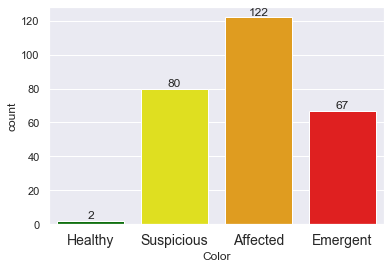

In [102]:
# # Health status count for each type in cleaned data
color_labels  = ['Healthy', 'Suspicious', 'Affected', 'Emergent']

ax = sns.countplot(x='Color', data=df_clean, palette={1:"green", 2:"yellow", 3:'orange', 4:'red'})
ax.set_xticklabels(color_labels, fontsize=14)
ax.bar_label(ax.containers[0])

<AxesSubplot:ylabel='Gender'>

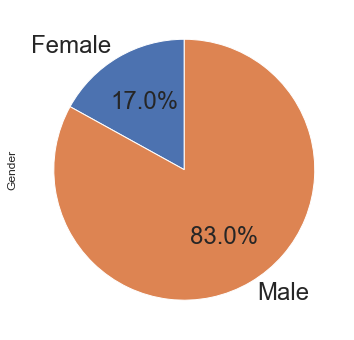

In [10]:
# gender percentage count in clened data
df.groupby("Gender")["Gender"].count().plot.pie(figsize=(6,6), autopct='%1.1f%%', startangle=90, fontsize=24, labels=['Female','Male'])

[Text(0, 0, '46'), Text(0, 0, '225')]

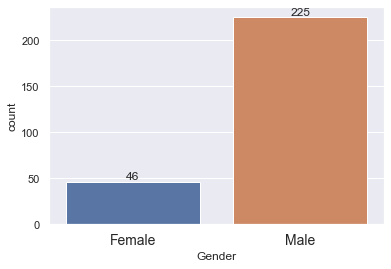

In [66]:
# Gender count for each type in Cleaned Data
gender_labels  = ['Female', 'Male']

ax = sns.countplot(x='Gender', data=df_clean)
ax.set_xticklabels(gender_labels, fontsize=14)
ax.bar_label(ax.containers[0])

[Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '52'),
 Text(0, 0, '67'),
 Text(0, 0, '59'),
 Text(0, 0, '90')]

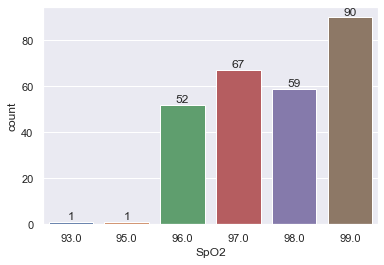

In [40]:
# spo2 count for each type
ax = sns.countplot(x='SpO2', data=df_clean)
ax.bar_label(ax.containers[0])

## Importing Data of three phases(each phase is 3 months apart)

In [100]:
df1 = pd.read_csv('dataset/p1_cleaned_data.csv', index_col=0)
df2 = pd.read_csv('dataset/p2_cleaned_data.csv', index_col=0)
df3 = pd.read_csv('dataset/p3_cleaned_data.csv', index_col=0)

No healthy or suspacious patients


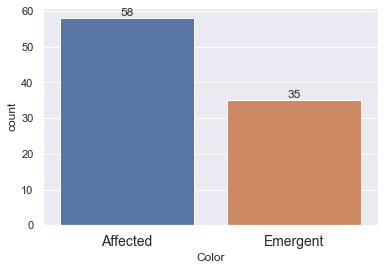

In [98]:
# Health status count for each type in Phase 1
color_labels  = ['Affected', 'Emergent']
ax = sns.countplot(x='Color', data=df1)
ax.set_xticklabels(color_labels, fontsize=14)
ax.bar_label(ax.containers[0])
print('No healthy or suspacious patients')

[Text(0, 0, '1'), Text(0, 0, '20'), Text(0, 0, '43'), Text(0, 0, '29')]

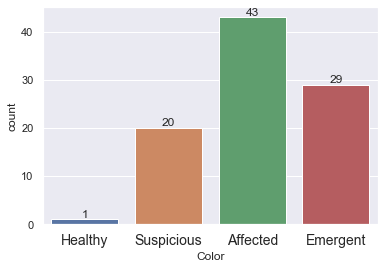

In [97]:
# Health status count for each type in Phase 2
color_labels  = ['Healthy', 'Suspicious', 'Affected', 'Emergent']
ax = sns.countplot(x='Color', data=df2)
ax.set_xticklabels(color_labels, fontsize=14)
ax.bar_label(ax.containers[0])

[Text(0, 0, '2'), Text(0, 0, '38'), Text(0, 0, '41'), Text(0, 0, '12')]

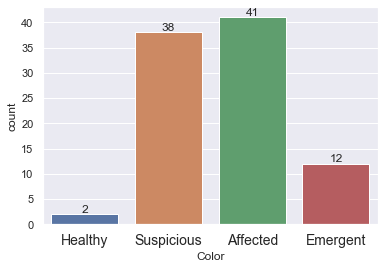

In [96]:
# Health status count for each type in Phase 3
color_labels  = ['Healthy', 'Suspicious', 'Affected', 'Emergent']
ax = sns.countplot(x='Color', data=df3)
ax.set_xticklabels(color_labels, fontsize=14)
ax.bar_label(ax.containers[0])

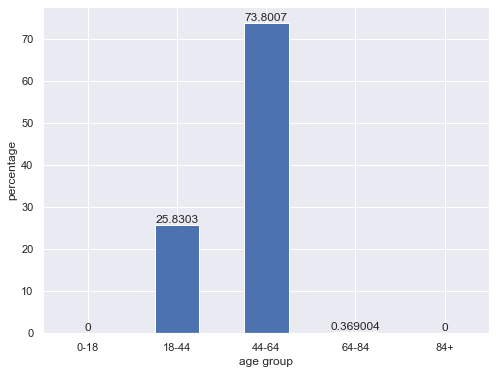

In [95]:
# Age groups available in the data set in percentage
out = pd.cut(df['Age '], bins=[0, 18, 44, 64, 84, 120], labels=['0-18', '18-44', '44-64', '64-84', '84+'],include_lowest=False)
out_norm = out.value_counts(sort=False, normalize=True).mul(100)
ax = out_norm.plot.bar(rot=0, color="b", figsize=(8,6))
ax.bar_label(ax.containers[0])
plt.ylabel("percentage")
plt.xlabel("age group")

plt.show()

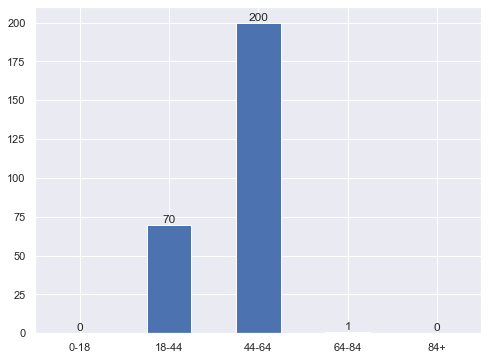

In [93]:
# Age groups member count in dataset
out = pd.cut(df['Age '], bins=[0, 18, 44, 64, 84, 120], labels=['0-18', '18-44', '44-64', '64-84', '84+'],include_lowest=False)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(8,6))
ax.bar_label(ax.containers[0])
plt.show()

In [110]:
df = df_clean.dropna()
features = df.drop(['Color'], axis=1)

label = df.Color
features.head()

,Age,Gender,Height,Weight,BMI,Waist,Hip,Waist/Hip Ratio,BodyTemperature,SpO2,BloodPressure(sys),BloodPressure(dia),BloodGlucose,PulseRate,BloodUricAcid
0,59,1,159.0,52.7,20.85,85.0,80,1.06,95.00,96.0,138,78,234.0,94,4.3
1,60,1,164.0,73.9,27.48,95.0,99,0.96,96.26,96.0,128,67,93.6,62,5.8
2,58,1,164.0,83.7,31.12,102.0,103,0.99,95.00,96.0,140,81,133.2,60,7.0
3,50,0,143.0,45.1,22.05,76.0,89,0.85,97.52,99.0,102,65,75.6,82,3.6
4,56,1,160.0,64.9,25.35,87.0,91,0.96,96.44,96.0,155,98,223.2,92,5.0


In [111]:
label.head()

0    3
1    2
2    3
3    2
4    3
Name: Color, dtype: int64

In [106]:
from sklearn.model_selection import train_test_split
# seperating traing and test data
data_train, data_test, label_train, label_test = train_test_split(features, label, test_size=0.2, random_state=2)

print(data.shape, data_train.shape, data_test.shape)

(270, 15) (216, 15) (54, 15)


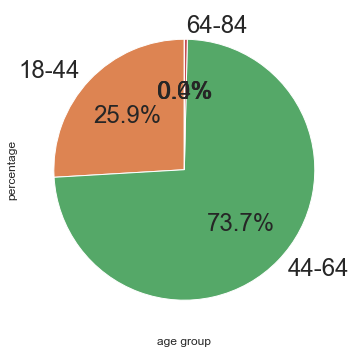

In [116]:
# Age groups available in the data set in percentage
out = pd.cut(df['Age '], bins=[0, 18, 44, 64, 84, 120], labels=['0-18', '18-44', '44-64', '64-84', '84+'],include_lowest=False)
out_norm = out.value_counts(sort=False, normalize=True).mul(100)
ax = out_norm.plot.pie(rot=0, figsize=(8,6), autopct='%1.1f%%', startangle=90, fontsize=24)
plt.ylabel("percentage")
plt.xlabel("age group")

plt.show()